<a href="https://colab.research.google.com/github/beatrizmilz/grupo_estudo_data_science_II/blob/master/consumo_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade EM ANDAMENTO - Consumo de cerveja 
Notebook com a atividade feita pela [@beatrizmilz](https://github.com/beatrizmilz), no Grupo de Estudos de Data Science 2 - PyLadies São Paulo. Apresentar dia 16/02/2020. 

Instruções: Usando a [base de consumo de cerveja](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo), disponível no [kaggle](https://www.kaggle.com/), aplique os conceitos apresentados nos capítulos 2 e 3 do livro **[Estatística Básica](https://www.amazon.com.br/Estat%C3%ADstica-B%C3%A1sica-Wilton-Bussab/dp/8547220224)**.

## Importar bibliotecas

In [0]:

import pandas as pd 
import numpy as np
import datetime

# !pip install pyjanitor
import janitor

## Fazer download do dataset

In [0]:
# Para essa etapa é preciso utilizar a API do kaggle. Eu utilizei, mas depois 
# retirei meus dados e comentei a linha. 
# Para criar a API, no kaggle clique em "my account",
# e na seção API clique em "Create new API token".
# Usar essas credenciais no código abaixo, em "username" e "key".

# !mkdir /root/.kaggle # Cria o diretório .kaggle        
# !echo '{"username":"kaggle_username","key":"kaggle_key"}' > chmod 600 /root/.kaggle/kaggle.json


In [0]:
# Define qual dataset quero baixar, e faz o download
# !kaggle datasets download -d dongeorge/beer-consumption-sao-paulo

In [3]:
# Conferir se baixou o beer-consumption-sao-paulo.zip
!ls

beer-consumption-sao-paulo.zip	chmod  Consumo_cerveja.csv  sample_data


In [0]:
# É um zip. Para ter acesso ao .csv, é necessário usar o unzip
# !unzip beer-consumption-sao-paulo.zip


In [4]:
# Conferir se o arquivo .csv está nos arquivos.
!ls

beer-consumption-sao-paulo.zip	chmod  Consumo_cerveja.csv  sample_data


## Abrir a base de dados e arrumá-los

In [0]:
# Usando a biblioteca pandas, ler o .csv e atribuir ao dataframe consumo_cerveja
#  e limpar os nomes das colunas
consumo_cerveja = (pd.read_csv("Consumo_cerveja.csv", decimal=',')
                    .clean_names()
                   .rename_column("temperatura_media_c_", "temperatura_media")
                   .rename_column("temperatura_minima_c_", "temperatura_minima")
                   .rename_column("temperatura_maxima_c_", "temperatura_maxima")
                   .rename_column("precipitacao_mm_", "precipitacao")
                   .rename_column("consumo_de_cerveja_litros_", "consumo_de_cerveja")
)

In [6]:
# Função head para ler as primeiras linhas do dataframe
consumo_cerveja.head()

,data,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,final_de_semana,consumo_de_cerveja
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [7]:
# Quantas observações e variáveis temos nesta base?
print("Observações:", consumo_cerveja.shape[0])
print("Variáveis:", consumo_cerveja.shape[1])

Observações: 941
Variáveis: 7


In [8]:
# Quais são os tipos de dados?
consumo_cerveja.dtypes

data                   object
temperatura_media     float64
temperatura_minima    float64
temperatura_maxima    float64
precipitacao          float64
final_de_semana       float64
consumo_de_cerveja     object
dtype: object

In [9]:
# Algumas variáveis estão com o tipo de dado incorreto. Corrigir isso!

consumo_cerveja['consumo_de_cerveja'] = consumo_cerveja['consumo_de_cerveja'].astype(float)

consumo_cerveja['final_de_semana'] = consumo_cerveja['final_de_semana'].astype(bool)

consumo_cerveja['data'] = pd.to_datetime(consumo_cerveja['data'])

consumo_cerveja.dtypes

data                  datetime64[ns]
temperatura_media            float64
temperatura_minima           float64
temperatura_maxima           float64
precipitacao                 float64
final_de_semana                 bool
consumo_de_cerveja           float64
dtype: object

## Capítulo 2 - Resumo de dados
Conceitos: 


*   Tipos de variáveis
*   Distribuição de frequências
*   Gráficos



In [10]:
# Quais variáveis temos nesta base de dados?
consumo_cerveja.columns

Index(['data', 'temperatura_media', 'temperatura_minima', 'temperatura_maxima',
       'precipitacao', 'final_de_semana', 'consumo_de_cerveja'],
      dtype='object')

Tipos de variáveis:


* Data: ?
* Temperatura (média, mínima, máxima) em graus celsius: variável quantitativa contínua
* Precipitação em milimetros: variável quantitativa contínua
* Final de semana (sim ou não): variável dicotômica 
* Consumo de cerveja em litros: variável quantitativa contínua



## Capítulo 3 - Medidas-resumo
Conceitos: 


*   Medidas de posição: média aritmética, moda, mediana
*   Medidas de dispersão: desvio padrão, variância, desvio médio
*   Quantis
*   Boxplot



### Calculando as medidas de posição

In [11]:
# Média
consumo_cerveja.mean()

temperatura_media     21.226356
temperatura_minima    17.461370
temperatura_maxima    26.611507
precipitacao           5.196712
final_de_semana        0.722635
consumo_de_cerveja    25.401367
dtype: float64

In [12]:
# Mediana
consumo_cerveja.median()

temperatura_media     21.380
temperatura_minima    17.900
temperatura_maxima    26.900
precipitacao           0.000
final_de_semana        1.000
consumo_de_cerveja    24.867
dtype: float64

In [13]:
# Moda 
consumo_cerveja.mode(numeric_only=True)

,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,final_de_semana,consumo_de_cerveja
0,22.76,18.2,27.2,0.0,True,24.862
1,24.00,19.3,27.4,NaN,NaN,NaN
2,NaN,NaN,28.0,NaN,NaN,NaN


Tipos de moda para cada variável:
* unimodal: precipitação, final de semana, consumo de cerveja
* bimodal: temperatura média, temperatura mínima
* trimodal: temperatura máxima


### Calculando as medidas de dispersão

In [14]:
consumo_cerveja.std()

temperatura_media      3.180108
temperatura_minima     2.826185
temperatura_maxima     4.317366
precipitacao          12.417844
final_de_semana        0.447936
consumo_de_cerveja     4.399143
dtype: float64

In [15]:
consumo_cerveja.var()

temperatura_media      10.113085
temperatura_minima      7.987322
temperatura_maxima     18.639647
precipitacao          154.202846
final_de_semana         0.200647
consumo_de_cerveja     19.352457
dtype: float64

### Calculando os quantis


In [16]:
consumo_cerveja.quantile(q = 0.25)

temperatura_media     19.020
temperatura_minima    15.300
temperatura_maxima    23.800
precipitacao           0.000
final_de_semana        0.000
consumo_de_cerveja    22.008
Name: 0.25, dtype: float64

In [17]:
consumo_cerveja.quantile(q = 0.5)

temperatura_media     21.380
temperatura_minima    17.900
temperatura_maxima    26.900
precipitacao           0.000
final_de_semana        1.000
consumo_de_cerveja    24.867
Name: 0.5, dtype: float64

In [18]:
consumo_cerveja.quantile(q = 0.75)

temperatura_media     23.280
temperatura_minima    19.600
temperatura_maxima    29.400
precipitacao           3.200
final_de_semana        1.000
consumo_de_cerveja    28.631
Name: 0.75, dtype: float64

### Boxplot
- Não fiz da variável final de semana, pois é boolean.

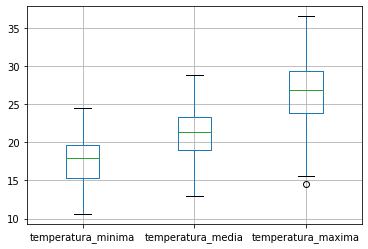

In [19]:
consumo_cerveja.boxplot(column=["temperatura_minima", "temperatura_media", "temperatura_maxima"])

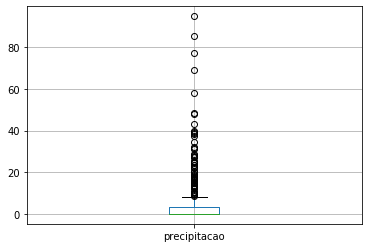

In [20]:
consumo_cerveja.boxplot(column=["precipitacao"])

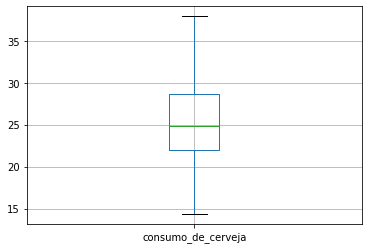

In [21]:
consumo_cerveja.boxplot(column=["consumo_de_cerveja"])